## **Credti Card Fraud Prediction**

## **Project Setup**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import kagglehub # type: ignore

In [2]:
# Download latest version of the dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

Path to dataset files: /Users/youhorng/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [3]:
# Load the train and test dataset
train_df = pd.read_csv(path + "/fraudTrain.csv")
test_df = pd.read_csv(path + "/fraudTest.csv")

# Merge train and test 
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**About Dataset**: The original dataset was divided into train and test sets with a total number of instances of 1,852,393, which were simulated to contain credit card transactions, including **Legitimate** and **Fraud Transactions** from January 2019 to December 2020.

- The dataset contains credit cards of 999 customers, performing transactions over two years with a pool of 693 merchants.

- It was generated using the [Sparkov Data Generation | GitHub](https://github.com/namebrandon/Sparkov_Data_Generation) tool created by **Brandon Harris**. The dataset can be found on the Kaggle platform through this [link](https://www.kaggle.com/datasets/kartik2112/fraud-detection).

**Dataset Features**

| Feature Name            | Description                                                   |
|-------------------------|---------------------------------------------------------------|
| **trans_date_trans_time** | The date and time of the transaction.                        |
| **cc_num**              | Credit card number used for the transaction.                 |
| **merchant**            | The merchant where the transaction occurred.                 |
| **category**            | The category of the merchant.                                |
| **amt**                 | The amount of the transaction.                               |
| **first**               | First name of the cardholder.                                |
| **last**                | Last name of the cardholder.                                 |
| **gender**              | Gender of the cardholder.                                    |
| **street**              | Street address of the cardholder.                            |
| **city**                | City of the cardholder.                                      |
| **state**               | State of the cardholder.                                     |
| **zip**                 | ZIP code of the cardholder.                                  |
| **lat**                 | Latitude of the cardholder's address.                        |
| **long**                | Longitude of the cardholder's address.                       |
| **city_pop**            | Population of the city where the cardholder resides.         |
| **job**                 | Job title of the cardholder.                                 |
| **dob**                 | Date of birth of the cardholder.                             |
| **trans_num**           | Unique transaction ID.                                       |
| **unix_time**           | Transaction time in Unix format.                             |
| **merch_lat**           | Latitude of the merchant's location.                         |
| **merch_long**          | Longitude of the merchant's location.                        |
| **is_fraud**            | Indicates whether the transaction is fraudulent (1) or legitimate (0). |

In [4]:
# Drop "Unnamed: 0" column
df.drop(columns=["Unnamed: 0"], inplace=True)

## **Data Understanding**

In [5]:
# Check for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

**Findings**: Base on the information about the dataset above, we need to change the data types of some features to be in the correct format and rename the columns to make them more informative and easy to understand.

In [6]:
# Check shape of the dataset
print(f"Number of rows in the dataset: {df.shape[0]}")
print(f"Number of columns in the dataset: {df.shape[1]}")

Number of rows in the dataset: 1852394
Number of columns in the dataset: 22


**Findings**: The train and test dataset combined together contains nearly 1.9 Million Records of Transactions with 21 feature columns and 1 target variable. 

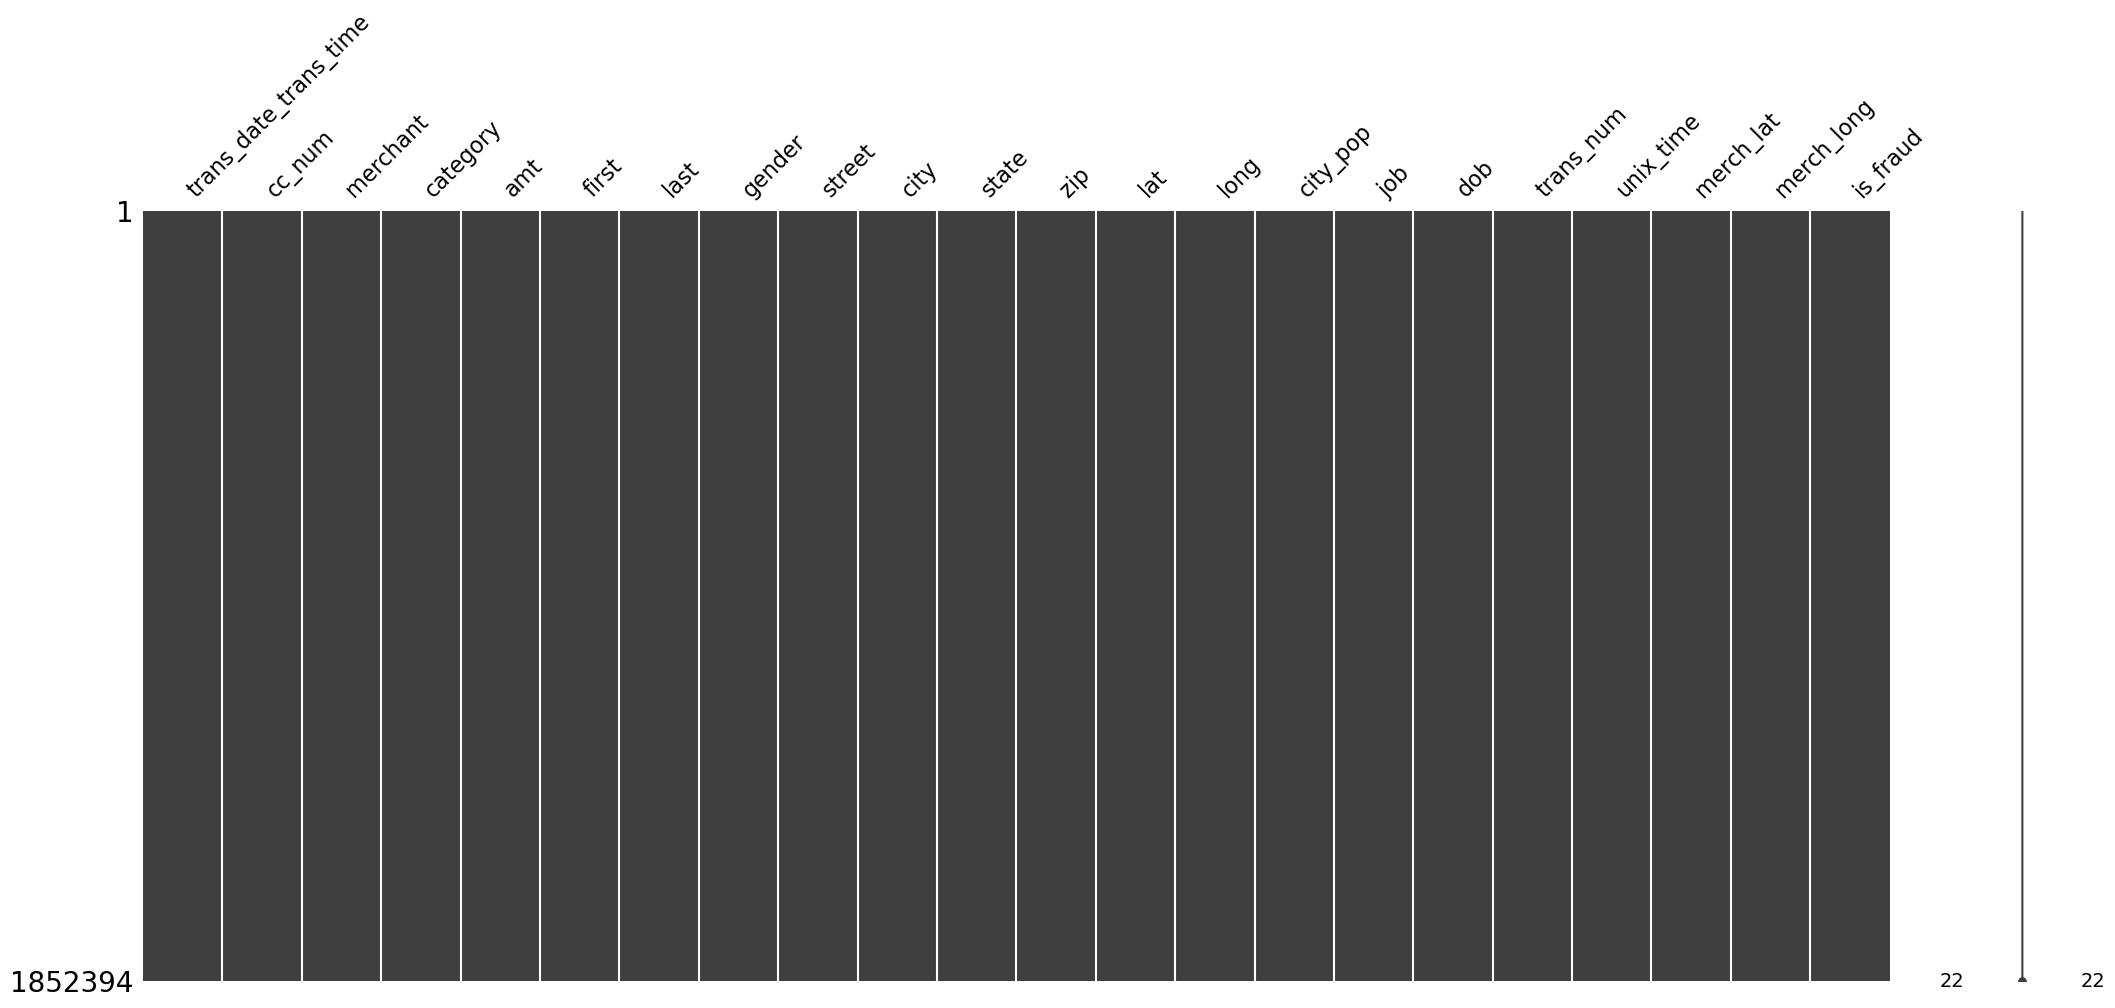

In [7]:
# Check for missing values 
msno.matrix(df)
plt.show()

In [8]:
# Check for duplications
df.duplicated().sum()

0

**Findings**: There are no missing values within the dataset and no duplicated rows as well, which means that the dataset is already clean, and there is no need to do imputation to fill missing values.

In [9]:
# Check fraud distribution 
count_fraud = df["is_fraud"].value_counts()
count_fraud = count_fraud.to_frame(name="count")
count_fraud["percentage"] = np.round(count_fraud["count"] / count_fraud["count"].sum() * 100, 2)
count_fraud

,count,percentage
is_fraud,,
0,1842743,99.48
1,9651,0.52


**Findings**: It is already known that dataset like credit card fraud detection dataset is highly imbalanced as the majority of the transactions are normal transactions and very low numbers of fraud transactions. In this dataset, we can see that the normal transactions are **99.48%** and fraud transactions are **0.52%** which are **1,842,743** and **9651** transactions respectively.

## **Data Cleaning**

After getting to understand a bit about the dataset that we are going to use to predict the credit card fraud transactions, we will start cleaning and preparing the dataset to make it more informative and ready to be used for analysi to gain deeper insights into the patterns of fraud and normal transactions. In this **Data Cleaning** step, we are going to:

- Rename the columns to make it more understandable and informative. 

- Change data types of the columns to be in the correct format for analysis.

- Create new column by combining the original columns together, reducing the number of unnecessary columns. 

- Remove the prefix of **merchant** column as the original data contains **fraud_** in front of merchant names.

In [10]:
# Rename column names 
df = df.rename(columns={"trans_date_trans_time": "transaction_time",
                        "cc_num": "credit_card_number",
                        "amt": "transaction_amount",
                        "first": "first_name",
                        "last": "last_name",
                        "city_pop": "city_population",
                        "dob": "date_of_birth",
                        "lat": "latitude",
                        "long": "longitude",
                        "trans_num": "transaction_number",
                        "merch_lat": "merchant_latitude",
                        "merch_long": "merchant_longitude"})

In [11]:
# Change data types to the appropriate ones
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
df["credit_card_number"] = df["credit_card_number"].astype(str)
df["zip"] = df["zip"].astype(str)
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"])

In [12]:
# Create full name column 
df["full_name"] = df["first_name"] + " " + df["last_name"]

# Create age column
df["age"] = df["transaction_time"].dt.year - df["date_of_birth"].dt.year

# Create transaction location 
df["transaction_location"] = df["longitude"].astype(str) + ", " + df["latitude"].astype(str)

# Create merchange location
df["merchant_location"] = df["merchant_longitude"].astype(str) + ", " + df["merchant_latitude"].astype(str)

# Create hour of transaction
df["transaction_hour"] = df["transaction_time"].dt.hour

In [13]:
# Drop columns that are not needed for analysis
dropped_columns = ["unix_time", "first_name", "last_name", "date_of_birth", 
                   "merchant_latitude", "merchant_longitude", "longitude", "latitude"]
df.drop(columns=dropped_columns, inplace=True)

In [14]:
# Clean merchant name 
df["merchant"] = df["merchant"].str.removeprefix("fraud_")

In [15]:
# Check the updated dataframe
df.head()

,transaction_time,credit_card_number,merchant,category,transaction_amount,gender,street,city,state,zip,city_population,job,transaction_number,is_fraud,full_name,age,transaction_location,merchant_location,transaction_hour
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,Jennifer Banks,31,"-81.1781, 36.0788","-82.048315, 36.011293",0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,Stephanie Gill,41,"-118.2105, 48.8878","-118.186462, 49.159046999999994",0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,Edward Sanchez,57,"-112.262, 42.1808","-112.154481, 43.150704",0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,0,Jeremy White,52,"-112.1138, 46.2306","-112.561071, 47.034331",0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0,Tyler Garcia,33,"-79.4629, 38.4207","-78.632459, 38.674999",0


## **Exploratory Data Analysis**

In this step, we are going to explore in deep about the dataset to gain insights and patterns of the data. We are going to identify which features that can lead to fraud transactions by understanding the patterns and characteristics of normal and fraud transactions. 

- Get an overview of statistic values of the dataset from numerical and categorical features. 

- Understand the relationship between fraud and transaction amount, transaction time, merchant category or name. 

    - Are frauds mostly small or large amounts?

    - Any obvious outliers or suspicous spikes in eash card holder?

    - Do fraud mostly happen at younger ages or older ages?

    - Do fraud cluster at certain hours? 

    - What are the temporal fraud patterns? 

    - Are certain merchants frequently involved in fraud?

- Understand the relationship between fraud and transaction locations and merchant locations

    - Do fraud happen when the transactions and merchant distant far from each other?

    - Where do the fraud happen the most, at which locations? 

- Understand the behavioral pattenrs per user and merchant

    - How many transactions does each user did per day? Any spikes of number transaction?

    - What are the time between transactions? Were there frequent transactions in short time? 

    - Are there any high transactions over short period of time in certain merchant?


In [16]:
# Statistical overview of numerical features
df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_time,1852394,2020-01-20 21:31:46.801827328,2019-01-01 00:00:18,2019-07-23 04:13:43.750000128,2020-01-02 01:15:31,2020-07-23 12:11:25.249999872,2020-12-31 23:59:34,NaN
transaction_amount,1852394.0,70.063567,1.0,9.64,47.45,83.1,28948.9,159.253975
city_population,1852394.0,88643.674509,23.0,741.0,2443.0,20328.0,2906700.0,301487.618344
is_fraud,1852394.0,0.00521,0.0,0.0,0.0,0.0,1.0,0.071992
age,1852394.0,46.21138,14.0,33.0,44.0,57.0,96.0,17.395446
transaction_hour,1852394.0,12.806119,0.0,7.0,14.0,19.0,23.0,6.815753


**Findings**: According to the statistical table above about numerical features, we have found that:

- `transaction_amount`: The average transaction amount is about 70$ with a minimum value of 1$ and 75% of the amounts are below 83$. The maximum transaction amount is about 29,000$ which can indicate outliers in this case with a right-skewed distribution (data points mostly left side).

- `city_population`: The average population in city is around 89,000 people with a minimum value of 23 people to maximum value of 2,906,700 people, indicating outliers and right-skewed distribution. 

- `age`: The average age of credit card holder is 46 years old with a minimum age of 14 yeras old and maximum of 96 years old. This means that mostly, they are working adult. 

In [17]:
# Statistical overview of categorical features
df.describe(include=["object"]).T

,count,unique,top,freq
credit_card_number,1852394,999,6538441737335434,4392
merchant,1852394,693,Kilback LLC,6262
category,1852394,14,gas_transport,188029
gender,1852394,2,F,1014749
street,1852394,999,444 Robert Mews,4392
city,1852394,906,Birmingham,8040
state,1852394,51,TX,135269
zip,1852394,985,82514,5116
job,1852394,497,Film/video editor,13898
transaction_number,1852394,1852394,0b242abb623afc578575680df30655b9,1


**Findings**: According to the statistical table above about the categorical features, we have found that:

- `credit_card_number`: There are 999 credit card holders in the dataset, performing an overal of nearly 1.9 Million Transactions. But the card holder names are only 989 which means that one person that can hold multiple cards.

- `merchant`: There are 693 different merchants that the transactions are being sent to.

- `gender`: There are Male and Female card holders, Female instances are higher than Male about 5%.

- `job`: There are 497 unique jobs with Film/video editor as the most frequent one.

- **Location**: There are total of 999 different streets, 906 cities, 51 states, 985 zips. 

    - The longitude and latitude of the transactions have 989 unique numbers.

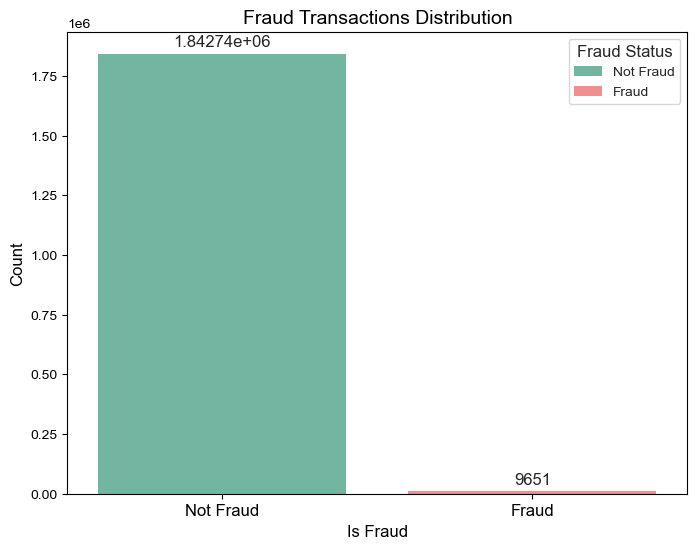

In [18]:
# Plot the distribution of fraud transactions
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="is_fraud", hue="is_fraud", palette=["#66c2a5", "#FF7F7F"])
sns.set_theme(style="whitegrid")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title("Fraud Transactions Distribution", fontsize=14)
plt.xlabel("Is Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.legend(title="Fraud Status", loc="upper right", labels=["Not Fraud", "Fraud"], fontsize=10)
plt.show()

**Findings**: The target variable of fraud and non-fraud transactions are highly imbalanced with only 9651 over nearly 1.85 Million Record of Transactions.

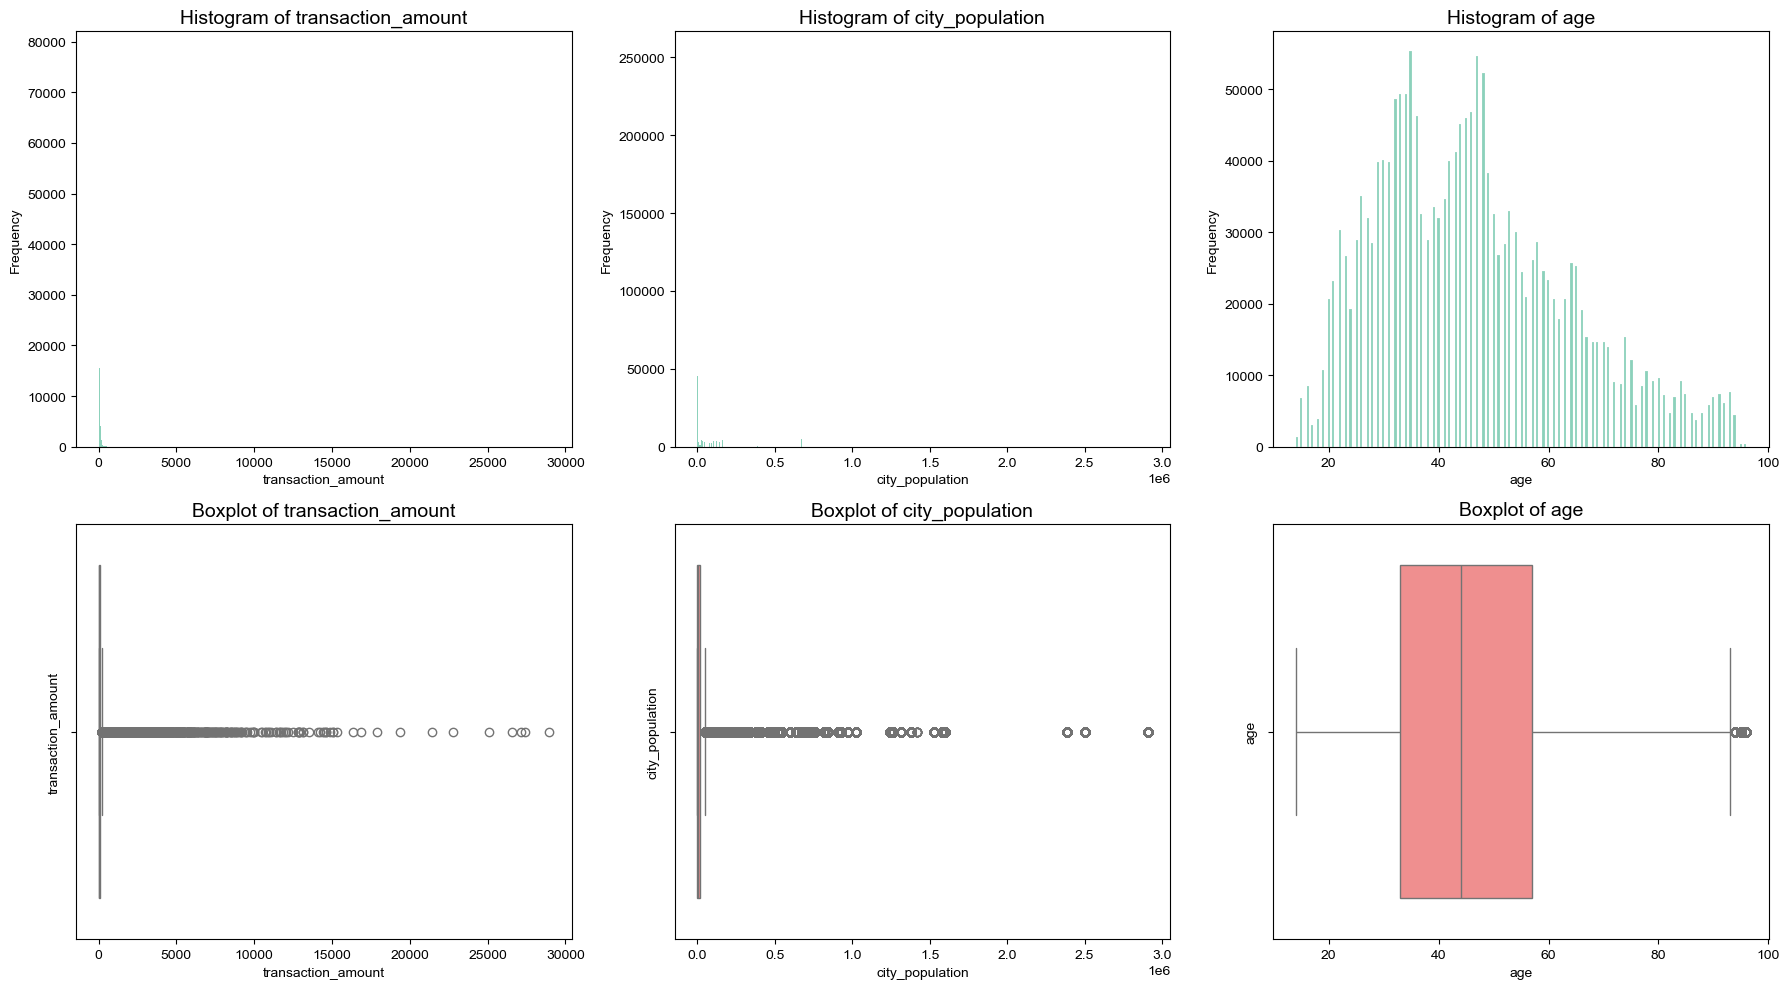

In [35]:
# Plot the distribution of numerical features
numerical_features = ["transaction_amount", "city_population", "age"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
sns.set_style("whitegrid")

for idx, feature in enumerate(numerical_features):
    # Column index (0, 1, 2)
    col = idx

    # Histogram on the first row
    sns.histplot(df[feature], ax=axes[0, col], color="#66c2a5")
    axes[0, col].set_title(f"Histogram of {feature}", fontsize=14)
    axes[0, col].set_xlabel(feature)
    axes[0, col].set_ylabel("Frequency")

    # Boxplot on the second row
    sns.boxplot(x=df[feature], ax=axes[1, col], color="#FF7F7F", orient="h")
    axes[1, col].set_title(f"Boxplot of {feature}", fontsize=14)
    axes[1, col].set_xlabel(feature)  
    axes[1, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [23]:
# Calcute the IQR range to detect outliers 
def calculate_iqr_range(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return lower_bound, upper_bound

# Calculate IQR range for each numerical feature
for feature in numerical_features:
    lower_bound, upper_bound = calculate_iqr_range(df, feature)
    print(f"{feature} IQR Range: {lower_bound:.2f} to {upper_bound:.2f}")

transaction_amount IQR Range: -100.55 to 193.29
city_population IQR Range: -28639.50 to 49708.50
age IQR Range: -3.00 to 93.00


**Findings**: From the distribution of the numerical features above, we have found that:

- `transaction_amount`: There are a lot of outliers in the transaction amount as we can see in the box plot where the outliers are mostly from 193$ onwards until 30000$. This indicates that there are normally a lot of small transactions using the credit cards. 

- `city_population`: There are also a lot of outliers here for city population as well. The outliers are from about 50000 people onwards.

- `age`: Mostly the credit card holders are around 43 years old, and there are not many outliers compared to the other two numerical features.

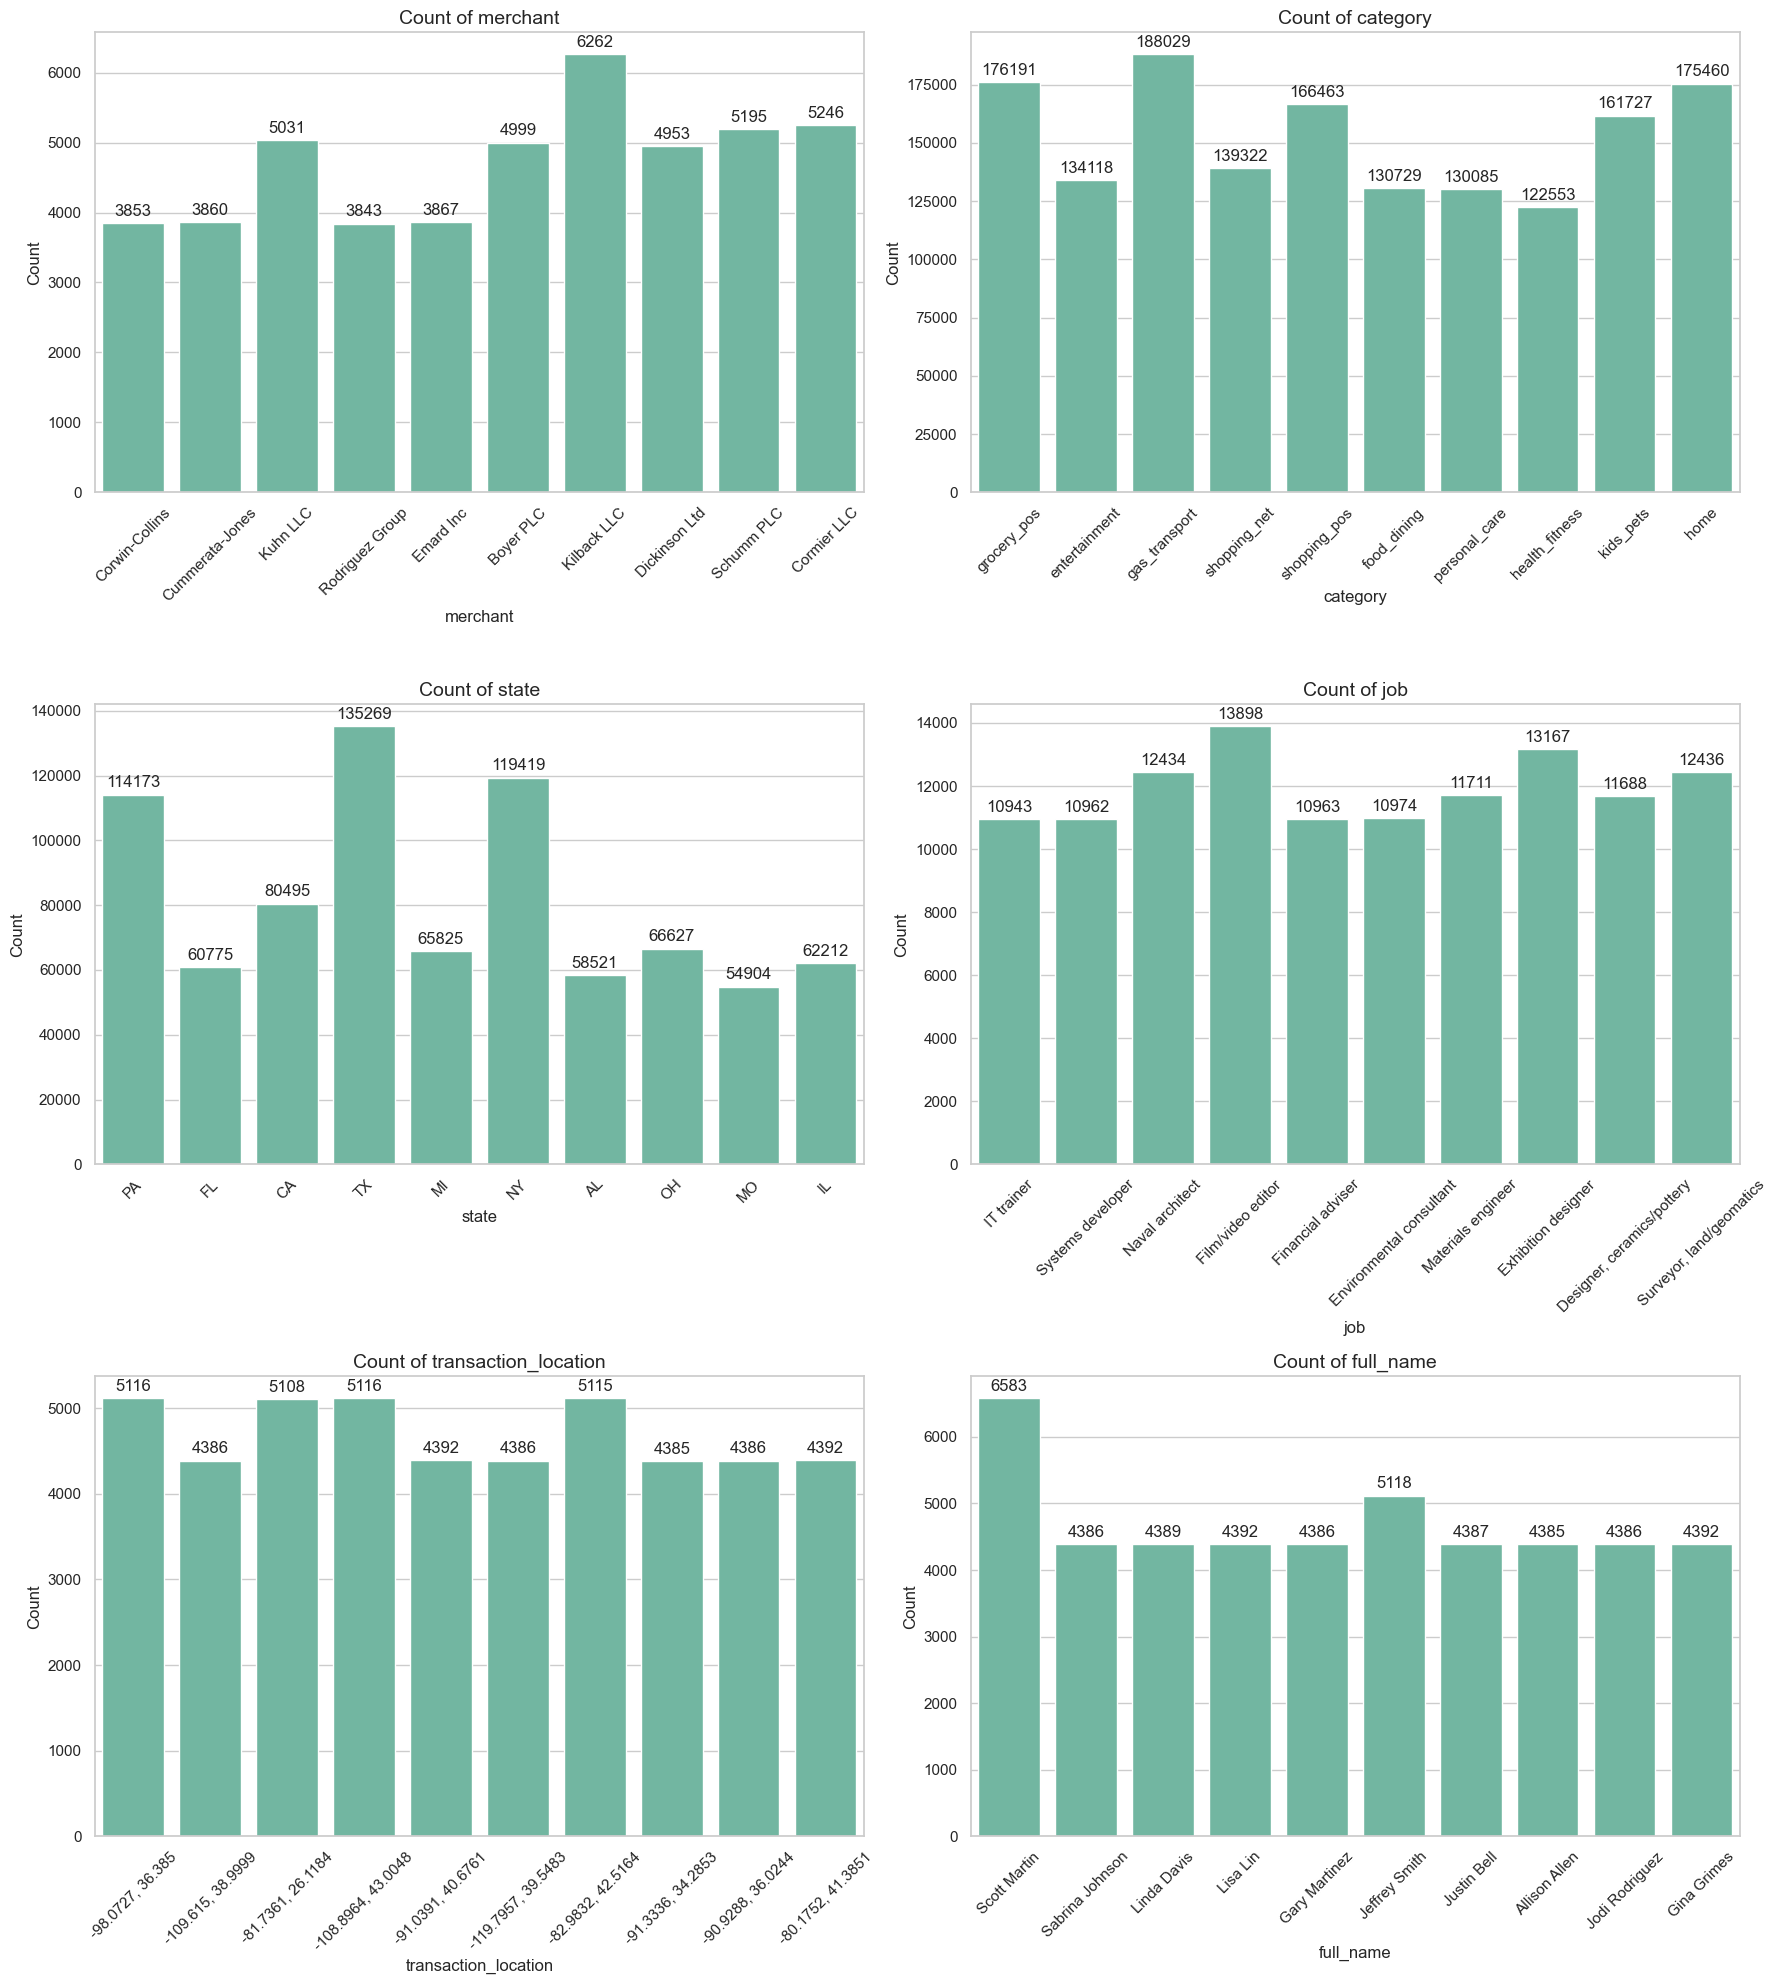

In [ ]:
# Plot the distribution of categorical features
categorical_features = ["merchant", "category", "state", "job", "transaction_location", "full_name"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))

for idx, feature in enumerate(categorical_features):
    col = idx % 2
    row = idx // 2

    # Get the top 10 most frequent categories 
    top_n = df[feature].value_counts().nlargest(10).index
    filterd_df = df[df[feature].isin(top_n)]

    # Count plot to check distribution
    ax = sns.countplot(data=filterd_df, x=feature, ax=axes[row, col], color="#66c2a5")

    for container in ax.containers:
        ax.bar_label(container, padding=3)
        
    axes[row, col].set_title(f"Count of {feature}", fontsize=14)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Findings**: From the countplots above of the categorical features checking only the top 10 largest catogories as there are a lot of unique values in each feature, we have found that:

- `category`:

    - The most common transaction category is gas_transport, suggesting that cardholders frequently use their cards for fueling transportation.

    - This is followed by grocery_pos (grocery shopping at point-of-sale), home, and shopping_pos.

    - Overall, the top categories are primarily associated with daily necessities and retail purchases.

- `state`:

    - The states with the highest number of transactions are Texas (TX), New York (NY), and Pennsylvania (PA).

    - Other states such as California (CA) follow, but with a significant drop—approximately half the transaction volume of the top three.

- `job`:

    - The most common occupation among cardholders is Film/video editor, followed by Exhibition designer and Naval architect.

    - These results may indicate specific professional segments with high card usage or representation in the dataset.

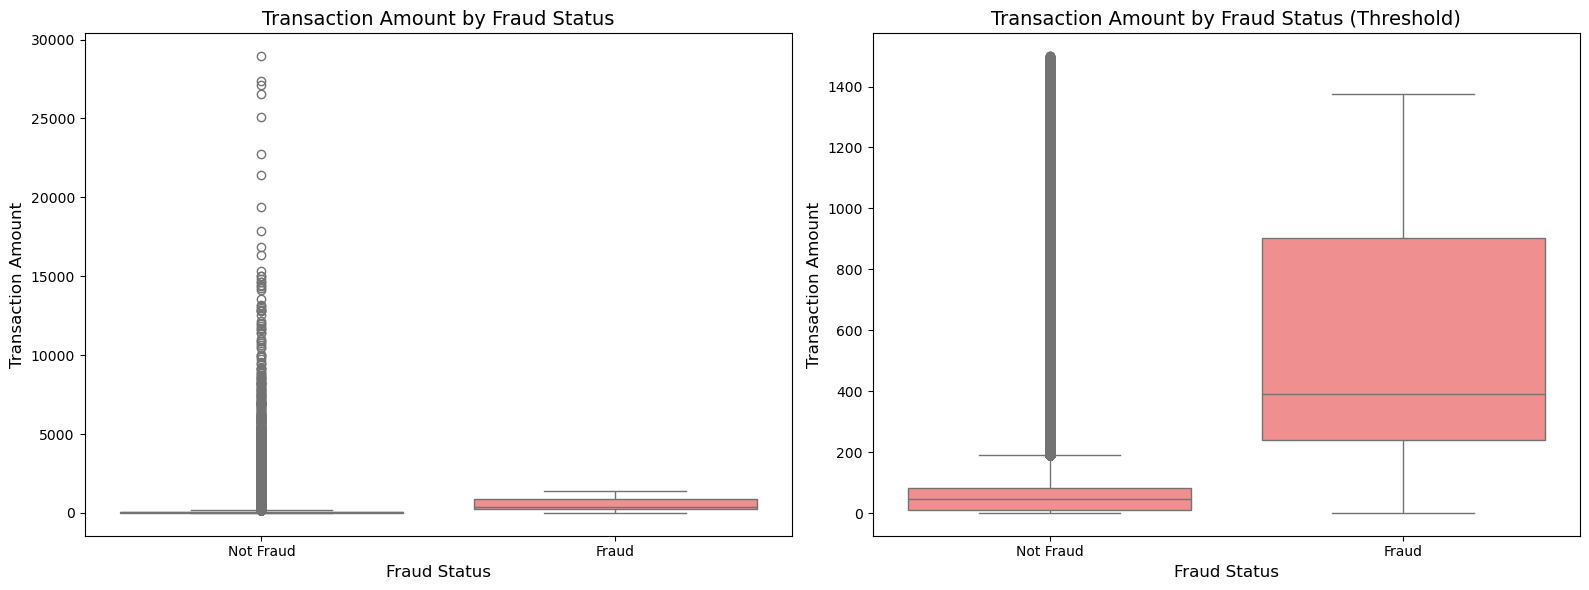

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(data=df, x="is_fraud", y="transaction_amount", ax=axes[0], color="#FF7F7F")
axes[0].set_title("Transaction Amount by Fraud Status", fontsize=14)
axes[0].set_xlabel("Fraud Status", fontsize=12)
axes[0].set_ylabel("Transaction Amount", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Fraud", "Fraud"])

# Filter out outliers for better visualization
transaction_filter = df[df["transaction_amount"] < 1500]  
sns.boxplot(data=transaction_filter, x="is_fraud", y="transaction_amount", ax=axes[1], color="#FF7F7F")
axes[1].set_title("Transaction Amount by Fraud Status (Threshold)", fontsize=14)
axes[1].set_xlabel("Fraud Status", fontsize=12)
axes[1].set_ylabel("Transaction Amount", fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Not Fraud", "Fraud"])

plt.tight_layout()
plt.show()

**Findings**: Analyzing the distribution of transaction amounts between fraudulent and non-fraudulent transactions provides clearer insights into how they differ:

- Non-fraudulent transactions are predominantly small in amount, especially when excluding outliers (which begin around $200). This suggests that typical legitimate transactions are low-value, consistent with everyday purchases such as fuel, groceries, or routine shopping.

    - The outliers among non-fraudulent transactions may be due to emergency spending or high-value purchases, but they do not indicate fraudulent activity.

- In contrast, fraudulent transactions show a wider range of amounts, spanning from $1 to nearly $1,400, but rarely exceeding this upper limit.

    - The median transaction amount for fraud is approximately $400, which is more than four times higher than the median for non-fraudulent transactions. This suggests that fraud tends to occur more often in higher-value transactions, potentially to maximize illicit gains.

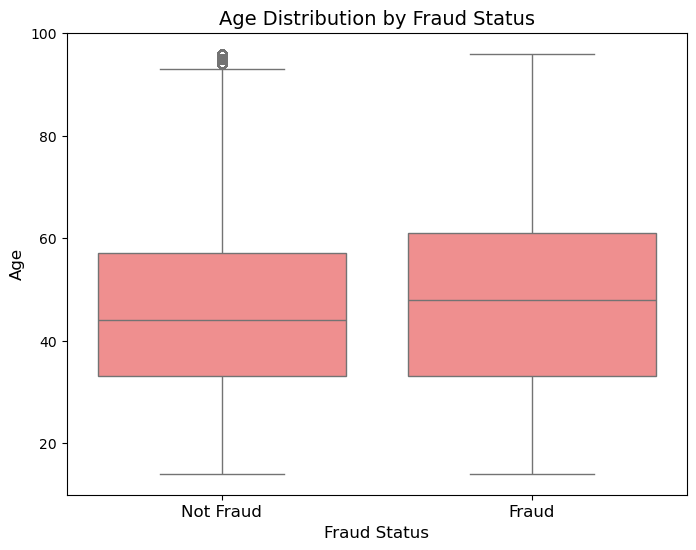

In [32]:
# Check how age affects fraud transactions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="is_fraud", y="age", color="#FF7F7F")
plt.title("Age Distribution by Fraud Status", fontsize=14)
plt.xlabel("Fraud Status", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

**Findings**: Based on the boxplot above, we can see that there is not much difference between age on fraud and non-fraud transaction which means that age does not have an impact that leads to fraud. 

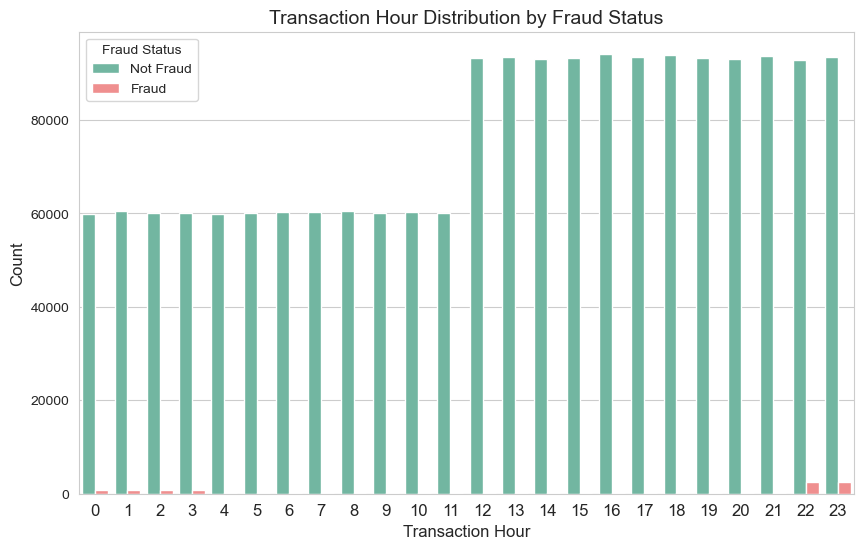

In [ ]:
# Check how transaction hour affects fraud transactions
df["transaction_hour"] = df["transaction_hour"].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="transaction_hour", hue="is_fraud", palette=["#66c2a5", "#FF7F7F"])
plt.title("Transaction Hour Distribution by Fraud Status", fontsize=14)
plt.xlabel("Transaction Hour", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=np.arange(0, 24, 1), fontsize=12)
plt.legend(title="Fraud Status", loc="upper left", labels=["Not Fraud", "Fraud"], fontsize=10)
plt.show()

**Findings**: We can see some interesting figure here based on the number of fraud and non-fraud transactions happen at each hour across the day.

- Fraudulent transactions are more frequent during late-night hours, particularly between 10 PM and 3 AM.

- The highest concentration appears around 10 PM and 11 PM, indicating that fraudulent activity tends to spike during these hours

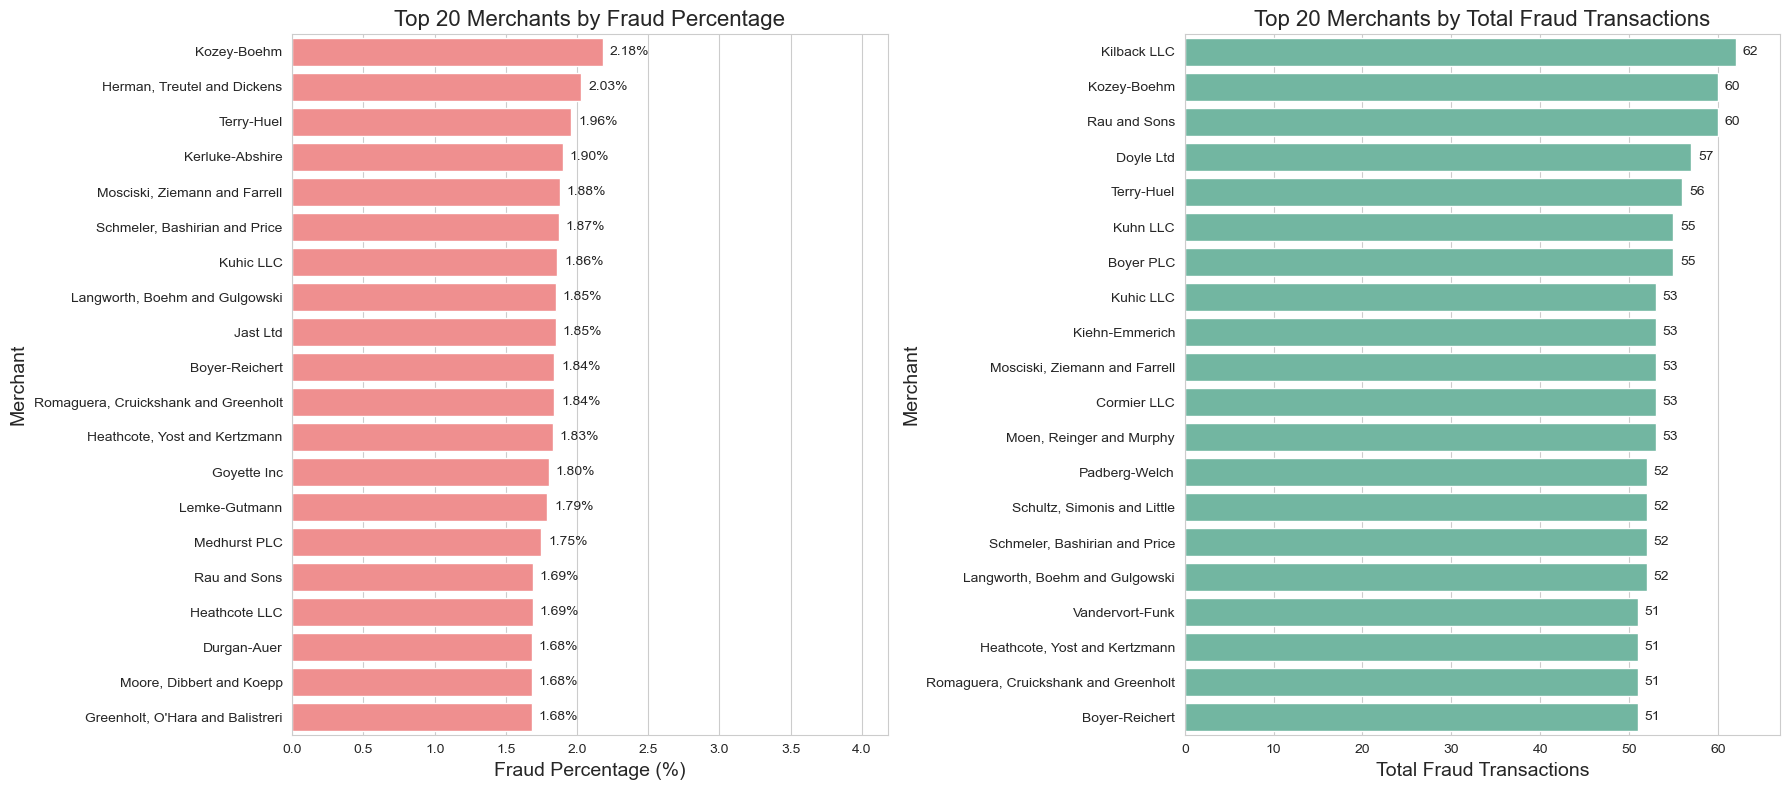

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Aggregate transaction counts by merchant and fraud status
counts = df.groupby(["merchant", "is_fraud"]).size().unstack(fill_value=0)
counts.columns = ["not_fraud", "fraud"]
counts["total"] = counts["not_fraud"] + counts["fraud"]
counts["fraud_percentage"] = np.round((counts["fraud"] / counts["total"]) * 100, 2)
counts = counts.sort_values(by="fraud_percentage", ascending=False)

# Select top 20 merchants by fraud percentage
top_20_merchants = counts.head(20).reset_index()

# Plot 1: Top 20 merchants by fraud percentage
ax1 = sns.barplot(data=top_20_merchants, x="fraud_percentage", y="merchant", color="#FF7F7F", ax=axes[0])
axes[0].set_title("Top 20 Merchants by Fraud Percentage", fontsize=16)
axes[0].set_xlabel("Fraud Percentage (%)", fontsize=14)
axes[0].set_ylabel("Merchant", fontsize=14)
axes[0].set_xlim(0, top_20_merchants["fraud_percentage"].max() + 2)

# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f%%', padding=5)

# Plot 2: Total fraud transactions by merchant (top 20 by fraud count for better focus)
top_20_fraud_count = counts.sort_values(by="fraud", ascending=False).head(20).reset_index()

ax2 = sns.barplot(data=top_20_fraud_count,x="fraud",y="merchant",color="#66c2a5",ax=axes[1]
)
axes[1].set_title("Top 20 Merchants by Total Fraud Transactions", fontsize=16)
axes[1].set_xlabel("Total Fraud Transactions", fontsize=14)
axes[1].set_ylabel("Merchant", fontsize=14)
axes[1].set_xlim(0, top_20_fraud_count["fraud"].max() + 5)

# Add bar labels
for container in ax2.containers:
    ax2.bar_label(container, padding=5)

plt.tight_layout()
plt.show()